In [176]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # pip install pandas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [137]:
data = pd.read_csv("vgsales.csv")
data.pop('Rank'), data.pop('Name')
data = data.dropna()
#data.isna().sum()
#data.duplicated().any()

In [138]:
def multi_encoder(dataframe, feature):
    feature_classes = dataframe[feature].unique()
    for p in range(len(feature_classes)):
        dataframe.replace(feature_classes[p], p, inplace = True)
    return dataframe

In [141]:
multi_encoder(data, 'Platform')
multi_encoder(data, 'Genre')
multi_encoder(data, 'Publisher')

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,2006.0,0,0,41.49,29.02,3.77,8.46,82.74
1,1,1985.0,1,0,29.08,3.58,6.81,0.77,40.24
2,0,2008.0,2,0,15.85,12.88,3.79,3.31,35.82
3,0,2009.0,0,0,15.75,11.01,3.28,2.96,33.00
4,2,1996.0,3,0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16593,8,2002.0,1,185,0.01,0.00,0.00,0.00,0.01
16594,18,2003.0,6,51,0.01,0.00,0.00,0.00,0.01
16595,6,2008.0,2,4,0.00,0.00,0.00,0.00,0.01
16596,3,2010.0,4,504,0.00,0.01,0.00,0.00,0.01


In [140]:
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)
print(data.shape, train_data.shape, test_data.shape)
train_label = train_data.pop('Global_Sales')
test_label = test_data.pop('Global_Sales')

(16291, 9) (13033, 9) (3258, 9)


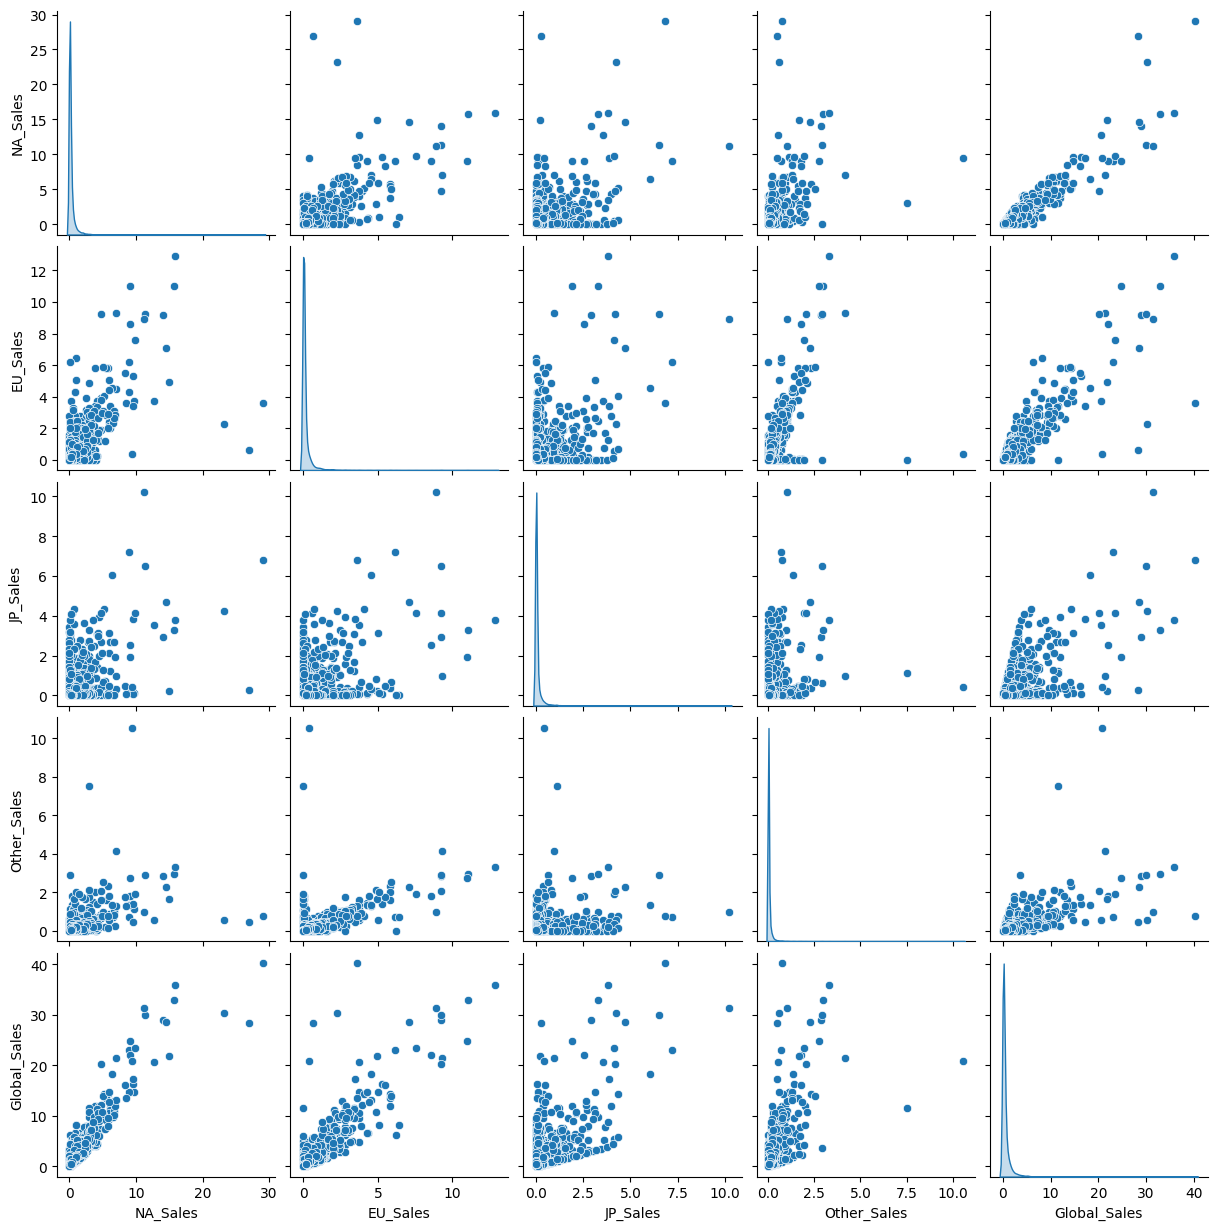

In [142]:
sns.pairplot(train_dataset[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']], diag_kind='kde')

In [146]:
# Normalize
#print(train_data.describe().transpose()[['mean', 'std']])

# Normalization
normalizer = preprocessing.Normalization()

# adapt to the data
normalizer.adapt(np.array(train_data))

In [167]:
dnn_model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

loss = keras.losses.MeanSquaredError() # MeanSquaredError
optim = keras.optimizers.Adam(learning_rate=0.1)

dnn_model.compile(loss = loss, 
                  optimizer = optim)

dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)                576       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


In [180]:
dnn_model.fit(
    train_data, train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
326/326 [==============================] - 1s 3ms/step - loss: 0.3023 - val_loss: 1.3439
Epoch 2/100
326/326 [==============================] - 1s 2ms/step - loss: 0.5980 - val_loss: 0.3071
Epoch 3/100
326/326 [==============================] - 1s 2ms/step - loss: 0.1229 - val_loss: 0.1761
Epoch 4/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0958 - val_loss: 0.1542
Epoch 5/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0779 - val_loss: 0.1258
Epoch 6/100
326/326 [==============================] - 1s 2ms/step - loss: 0.2049 - val_loss: 0.4381
Epoch 7/100
326/326 [==============================] - 1s 2ms/step - loss: 1.2124 - val_loss: 0.1880
Epoch 8/100
326/326 [==============================] - 1s 2ms/step - loss: 0.1042 - val_loss: 0.1637
Epoch 9/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0884 - val_loss: 0.1507
Epoch 10/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0761 - val_lo

326/326 [==============================] - 1s 2ms/step - loss: 0.0236 - val_loss: 0.0417
Epoch 82/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0998 - val_loss: 0.0400
Epoch 83/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0847 - val_loss: 0.1108
Epoch 84/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0689 - val_loss: 0.0372
Epoch 85/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0500 - val_loss: 0.0457
Epoch 86/100
326/326 [==============================] - 1s 3ms/step - loss: 0.2258 - val_loss: 0.0436
Epoch 87/100
326/326 [==============================] - 1s 3ms/step - loss: 0.0244 - val_loss: 0.0387
Epoch 88/100
326/326 [==============================] - 1s 2ms/step - loss: 0.1954 - val_loss: 0.2685
Epoch 89/100
326/326 [==============================] - 1s 2ms/step - loss: 0.1487 - val_loss: 0.0437
Epoch 90/100
326/326 [==============================] - 1s 2ms/step - loss: 0.0241 - val_loss: 

In [181]:
dnn_model.evaluate(test_data, test_labels, verbose=1)

102/102 [==============================] - 0s 2ms/step - loss: 0.9529


0.9528546333312988

In [182]:
model = LinearRegression()

# fitting the model
model.fit(train_data, train_label)
print(model.score(test_data, test_label))

# making predictions
#predictions = model.predict(test_data)

# model evaluation
print('mean_squared_error : ', mean_squared_error(test_label, predictions))
print('mean_absolute_error : ', mean_absolute_error(test_label, predictions))

#print('Coefficients : ', model.coef_)
#print('intercept : ', model.intercept_)

0.9999926569273432
mean_squared_error :  2.7675914574045767e-05
mean_absolute_error :  0.0029846956981069315
